# 第 6 步: CAMS AOD 预报数据可视化

此 Notebook 的目标是加载由 `05_cams_aod_acquisition` 下载的 CAMS AOD 预报数据，并为**指定的一个预报时间点**生成并显示一张地图。

这可以帮助我们直观地检查特定日出/日落时刻的气溶胶光学厚度分布情况。

**操作流程**:
1.  在下方的“参数配置”单元格中，设置你想分析的 `RUN_CYCLE_DIR` 和 `TARGET_LEADTIME_HOUR`。
2.  （可选）运行“数据文件分析”单元格，查看文件中包含的所有变量和可用的预报小时。
3.  运行“执行可视化”单元格，生成并查看地图。

In [1]:
# --- 核心库 ---
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import io
from IPython.display import display, Image

# --- 加载项目模块 ---
from chromasky_toolkit import config
from chromasky_toolkit.map_drawer import generate_map_from_grid

print("✅ 环境设置完毕。")

⚠️ Config: 未找到 .env 文件于 C:\Users\zhang\Documents\Code\chromasky-toolkit\src\.env


2025-08-09 22:34:43,325 - MapDrawer - INFO - 当前字体不支持中文，开始主动扫描系统可用中文字体...
2025-08-09 22:34:43,325 - MapDrawer - INFO - ✅ 找到可用的中文字体: 'PingFang TC'。将其设置为默认字体。
2025-08-09 22:34:43,326 - MapDrawer - INFO - 最终使用的字体列表: ['PingFang TC']


✅ 环境设置完毕。


## 1. 参数配置
**请在这里修改你要分析的目标数据**

In [2]:
# 指定包含 aod_forecast.nc 文件的运行周期目录名
RUN_CYCLE_DIR = "20250809_t00z"

# 指定你想可视化的预报时效（小时）
TARGET_LEADTIME_HOURS = [22, 23, 24, 25]

# 指定你想可视化的变量名 (从下面的分析单元格中选择)
# 'aod550' 是总气溶胶光学厚度，通常是首选
TARGET_VARIABLE = 'aod550'

## 2. （可选）数据文件分析
运行此单元格可以帮助你确认文件中包含了哪些变量和预报小时，以便在上方正确配置参数。

In [3]:

def analyze_cams_nc_file(file_path: Path):
    """
    分析指定的 CAMS NetCDF 文件，并打印出其完整的结构信息。
    """
    if not file_path.exists():
        print(f"❌ 文件不存在: {file_path}")
        return

    print(f"--- 正在分析文件: {file_path.name} ---\n")
    with xr.open_dataset(file_path, engine="netcdf4") as ds:
        # 打印完整的 Dataset 结构，这是最重要的调试信息
        print("【xarray.Dataset 完整结构】:")
        print(ds)
        print("\n" + "="*50 + "\n")

        # 打印可用的数据变量
        print("【可用的图层 (变量)】:")
        for var_name in ds.data_vars:
            long_name = ds[var_name].attrs.get('long_name', 'N/A')
            units = ds[var_name].attrs.get('units', 'N/A')
            print(f"- {var_name:<10} (单位: {units}, 描述: {long_name})")

# --- 执行分析 ---
target_file_path = config.CAMS_AOD_DATA_DIR / RUN_CYCLE_DIR / "aod_forecast.nc"
analyze_cams_nc_file(target_file_path)

--- 正在分析文件: aod_forecast.nc ---

【xarray.Dataset 完整结构】:
<xarray.Dataset> Size: 180kB
Dimensions:                  (forecast_period: 2, forecast_reference_time: 1,
                              latitude: 136, longitude: 163)
Coordinates:
  * forecast_period          (forecast_period) timedelta64[ns] 16B 21:00:00 1...
  * forecast_reference_time  (forecast_reference_time) datetime64[ns] 8B 2025...
  * latitude                 (latitude) float64 1kB 54.0 53.6 53.2 ... 0.4 0.0
  * longitude                (longitude) float64 1kB 70.0 70.4 ... 134.4 134.8
    valid_time               (forecast_reference_time, forecast_period) datetime64[ns] 16B ...
Data variables:
    aod550                   (forecast_period, forecast_reference_time, latitude, longitude) float32 177kB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:            

## 3. 执行可视化
这个单元格将加载数据、提取指定时间点的切片，并调用绘图函数生成地图。

2025-08-09 22:34:43,751 - MapDrawer - INFO - --- [绘图] 开始生成地图: Total Aerosol Optical Depth at 550nm
Forecast: 2025-08-10 05:00 (Asia/Shanghai)
Lead Time: 22h from 20250809_t00z ---


正在加载数据文件: C:\Users\zhang\Documents\Code\chromasky-toolkit\src\data\raw\cams_aod\20250809_t00z\aod_forecast.nc

开始为以下预报时效批量生成地图: [22, 23, 24, 25]

--- 正在处理预报时效: 22 小时 ---


2025-08-09 22:34:46,176 - MapDrawer - INFO - --- [绘图] 地图已成功保存到: C:\Users\zhang\Documents\Code\chromasky-toolkit\src\data\raw\cams_aod\20250809_t00z\aod_forecast_aod550_f022.png ---
2025-08-09 22:34:46,179 - MapDrawer - INFO - --- [绘图] 开始生成地图: Total Aerosol Optical Depth at 550nm
Forecast: 2025-08-10 05:00 (Asia/Shanghai)
Lead Time: 23h from 20250809_t00z ---


✅ 地图数据生成成功！
--------------------------------------------------
--- 正在处理预报时效: 23 小时 ---


2025-08-09 22:34:47,694 - MapDrawer - INFO - --- [绘图] 地图已成功保存到: C:\Users\zhang\Documents\Code\chromasky-toolkit\src\data\raw\cams_aod\20250809_t00z\aod_forecast_aod550_f023.png ---
2025-08-09 22:34:47,697 - MapDrawer - INFO - --- [绘图] 开始生成地图: Total Aerosol Optical Depth at 550nm
Forecast: 2025-08-10 05:00 (Asia/Shanghai)
Lead Time: 24h from 20250809_t00z ---


✅ 地图数据生成成功！
--------------------------------------------------
--- 正在处理预报时效: 24 小时 ---


2025-08-09 22:34:49,175 - MapDrawer - INFO - --- [绘图] 地图已成功保存到: C:\Users\zhang\Documents\Code\chromasky-toolkit\src\data\raw\cams_aod\20250809_t00z\aod_forecast_aod550_f024.png ---
2025-08-09 22:34:49,178 - MapDrawer - INFO - --- [绘图] 开始生成地图: Total Aerosol Optical Depth at 550nm
Forecast: 2025-08-10 05:00 (Asia/Shanghai)
Lead Time: 25h from 20250809_t00z ---


✅ 地图数据生成成功！
--------------------------------------------------
--- 正在处理预报时效: 25 小时 ---


2025-08-09 22:34:50,655 - MapDrawer - INFO - --- [绘图] 地图已成功保存到: C:\Users\zhang\Documents\Code\chromasky-toolkit\src\data\raw\cams_aod\20250809_t00z\aod_forecast_aod550_f025.png ---


✅ 地图数据生成成功！
--------------------------------------------------

所有地图已生成，正在并排显示...



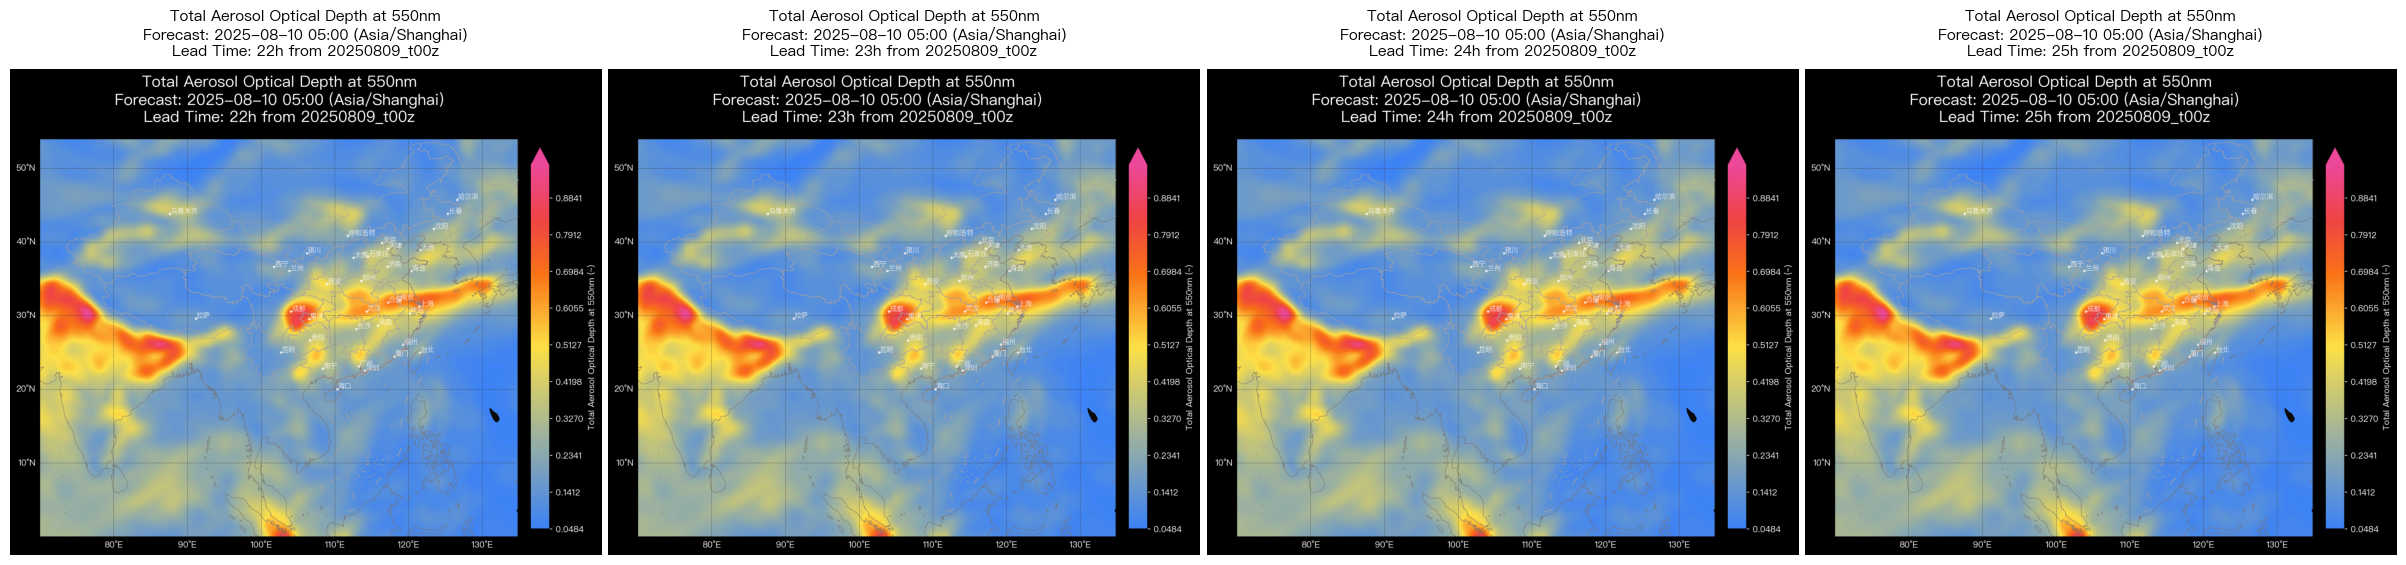

In [4]:

import pandas as pd
from datetime import timedelta
# --- 1. 定位并加载数据 ---
aod_file_path = config.CAMS_AOD_DATA_DIR / RUN_CYCLE_DIR / "aod_forecast.nc"

if not aod_file_path.exists():
    print(f"❌ 数据文件未找到，请检查路径和参数配置: {aod_file_path}")
else:
    print(f"正在加载数据文件: {aod_file_path}")
    
    # --- 3. 循环处理，收集所有生成的图像 ---
    generated_images = [] # 用于存储生成的图像二进制数据
    image_titles = []     # 用于存储每张图的标题

    try:
        with xr.open_dataset(aod_file_path, engine="netcdf4") as ds:
            print("\n" + "="*80)
            print(f"开始为以下预报时效批量生成地图: {TARGET_LEADTIME_HOURS}")
            print("="*80 + "\n")
            
            for hour in TARGET_LEADTIME_HOURS:
                print(f"--- 正在处理预报时效: {hour} 小时 ---")
                
                # a. 准备用于切片的目标预报时效
                target_forecast_period = timedelta(hours=hour)
                
                # b. 提取数据切片
                data_slice = ds[TARGET_VARIABLE].sel(
                    forecast_period=target_forecast_period, 
                    method='nearest'
                ).squeeze()
                
                # c. 构建地图标题
                long_name = data_slice.attrs.get('long_name', TARGET_VARIABLE.upper())
                actual_forecast_time_utc = pd.to_datetime(data_slice.valid_time.values)
                forecast_time_local = actual_forecast_time_utc.tz_localize('UTC').tz_convert(config.LOCAL_TZ)
                
                title = (
                    f"{long_name}\n"
                    f"Forecast: {forecast_time_local.strftime('%Y-%m-%d %H:%M')} ({config.LOCAL_TZ})\n"
                    f"Lead Time: {hour}h from {RUN_CYCLE_DIR}"
                )
                
                # d. 定义输出并调用绘图函数
                map_output_path = aod_file_path.parent / f"{aod_file_path.stem}_{TARGET_VARIABLE}_f{hour:03d}.png"
                image_bytes = generate_map_from_grid(data_slice, title, map_output_path)
                
                if image_bytes:
                    print(f"✅ 地图数据生成成功！")
                    generated_images.append(image_bytes)
                    image_titles.append(title)
                else:
                    print(f"❌ 地图生成失败。")
                print("-" * 50)

    except KeyError as e:
        print(f"❌ 发生错误: 无法在文件中找到变量 '{TARGET_VARIABLE}'。")
    except Exception as e:
        print(f"❌ 处理或绘图时发生未知错误: {e}", exc_info=True)

    # --- 4. 使用 Matplotlib 子图一次性并排显示所有收集到的图像 ---
    if generated_images:
        print("\n" + "="*80)
        print("所有地图已生成，正在并排显示...")
        print("="*80 + "\n")
        
        num_images = len(generated_images)
        # 创建一个一行 N 列的子图布局
        fig, axes = plt.subplots(1, num_images, figsize=(6 * num_images, 7)) # 增加高度以容纳标题
        
        # 如果只有一张图，axes 不是列表，需要特殊处理
        if num_images == 1:
            axes = [axes]
            
        for i, (img_bytes, title) in enumerate(zip(generated_images, image_titles)):
            # 将二进制数据读入为 Matplotlib 图像
            img = plt.imread(io.BytesIO(img_bytes), format='png')
            
            # 在对应的子图上显示图像
            ax = axes[i]
            ax.imshow(img)
            ax.set_title(title, fontsize=11, pad=10)
            ax.axis('off') # 关闭坐标轴
        
        plt.tight_layout(pad=0.5) # 调整布局，防止标题重叠
        plt.show() # 在 Notebook 中显示整个大图
        
    else:
        print("\n没有任何地图被成功生成，无法显示。")